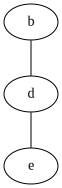

In [41]:
from cProfile import label
from cmath import nan
from hashlib import new
from nntplib import ArticleInfo
import networkx as nx
import graphviz
import numpy as np

G = nx.Graph()

caminos=[]
pisados=[]



matriz=[
    [0,10,3,0,0],
    [10,0,2,1.5,0],
    [3,2,0,1,6],
    [0,1.5,1,0,5],
    [0,0,6,5,0]
];


def dijkstra(punto=nan,final=nan, camino=[], contador=nan,pisadas=[], peso=0):
    if (punto==final):
        camino.append(punto)
        camino.append(peso)
        caminos.append(camino)
    
        return;
  
   
    if contador%2==1:
        newcontador=contador+1;
        #incremento en y
        pisadas.append(punto)
        for i in range (len(matriz)):
            if(matriz[punto][i]!=0) and i not in pisadas:
           
                newcomino=camino.copy()
                newcomino.append(punto)
                newpisadas=pisadas.copy()
                newpeso=peso+matriz[punto][i]
                
                dijkstra(punto=i,final=final,camino=newcomino,contador=newcontador,pisadas=newpisadas, peso=newpeso);
           
        
    else:
        #incremento en x
        
        newcontador=contador+1;
        pisadas.append(punto)
        for i in range (len(matriz[0])):
            
            if(matriz[i][punto]!=0)  and i not in pisadas:

                newcomino=camino.copy()
                newcomino.append(punto)
                newpisadas=pisadas.copy()
                newpeso=peso+matriz[i][punto]
           
                dijkstra (punto=i,final=final,camino=newcomino,contador=newcontador,pisadas=newpisadas, peso=newpeso);
            
        

    



dijkstra(punto=1,final=4,contador=1)


min=float("inf")
minCamino=nan;

for item in caminos:
    if(item[-1]<min):
        min=item[-1]
        minCamino=item;
        
minCamino.pop()


anterior="NULL"

for item in minCamino:
    if anterior=="NULL":
        
        anterior=item
    else:
         G.add_edge(chr(97+anterior), chr(97+item))
         anterior=item    


A = nx.nx_agraph.to_agraph(G)
A.layout('dot')

graphviz.Source(A.to_string()) 

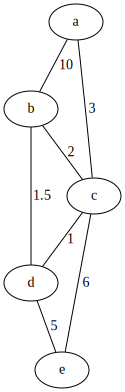

In [40]:
from cProfile import label
from nntplib import ArticleInfo
import networkx as nx
import graphviz
import numpy as np
G = nx.Graph()
adayacente=[
    [0,10,3,0,0],
    [10,0,2,1.5,0],
    [3,2,0,1,6],
    [0,1.5,1,0,5],
    [0,0,6,5,0]
];

for n in range(len(adayacente)):
    for i in range(len(adayacente[n])):
        if adayacente[n][i]>0:
            G.add_edge(chr(n+97), chr(i+97), label=str(adayacente[n][i]))
for n in range(len(adayacente)):
    G.add_node(chr(97+n))
for n in range(len(adayacente)):
    for i in range(len(adayacente[n])):
        if adayacente[n][i]>0:
            G.add_edge(chr(n+97), chr(i+97), label=str(adayacente[n][i]))

A = nx.nx_agraph.to_agraph(G)
A.layout('dot')

graphviz.Source(A.to_string()) 
# A.draw('salida.png') # guardar como png